In [1]:
import math
import numpy as np
import pandas as pd
import itertools
from Pricing.SABR import SABR_model
from Pricing.black_pricing import BSPricer_SABR
from Pricing.pdf_calculation import numerical_pdf
from Pricing.cdf_calculation import numerical_cdf
from matplotlib import pyplot as plt
from Pricing.arbitrage_check import arbitrage_check

In [15]:
F=[0.02,0.02]
vol=0.4
beta=0.9
rho=0
nu=0.5
alpha = 0.4 * math.pow(F[0],(1-beta))
expiry=np.array([5,20])
spread = np.arange(-0.02,0.1,0.01)
K = [[0 for y in range(len(spread))] for x in range(len(F))]

for i in range(len(F)):
    for j in range(len(spread)):
        K[i][j]=F[i]+spread[j]        
K=np.array(K)
#K

In [16]:
ivol = []
sabr=SABR_model(beta,rho,nu)
vols = sabr.ivol_matrix_validation(alpha,F,K,expiry,method='Hagan_ln')
print('Lognormal implied vols using Lognormal Hagan:')
vols

Lognormal implied vols using Lognormal Hagan:


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.873589,0.490319,0.440997,0.453034,0.476898,0.500426,0.521532,0.540182,0.556714,0.571479,0.584778,0.596851
1,1.121798,0.629515,0.566167,0.581606,0.612233,0.642430,0.669518,0.693454,0.714671,0.733622,0.750690,0.766183


In [17]:
h=0.0001
bs=BSPricer_SABR(beta,rho,nu)
price=bs.BS_matrix(alpha,F,K,expiry,1,0,'Hagan_ln')
price_plus=bs.BS_matrix(alpha,F,K+h,expiry,1,0,'Hagan_ln')
print('price:')
print(price)
print('price_plus:')
print(price_plus)

price:
[[ 0.01916817  0.01177092  0.00725819  0.00520018  0.00421931  0.00366848
   0.00331681  0.00307161  0.00288981  0.00274883  0.00263575  0.00254264]
 [ 0.01995302  0.01767179  0.01578862  0.01522534  0.01520776  0.0153437
   0.01551537  0.01568738  0.01584905  0.01599777  0.01613364  0.0162577 ]]
price_plus:
[[ 0.01908457  0.01170995  0.00722811  0.00518671  0.00421226  0.0036642
   0.00331393  0.00306953  0.00288822  0.00274757  0.00263473  0.00254179]
 [ 0.01994383  0.0176461   0.01577766  0.01522352  0.01520868  0.01534534
   0.01551711  0.01568905  0.01585061  0.01599919  0.01613494  0.01625889]]


In [18]:
(price_plus-price)/h

array([[-0.836008  , -0.60975818, -0.30080751, -0.1346698 , -0.07051496,
        -0.04280521, -0.02880858, -0.02082499, -0.01584553, -0.01252546,
        -0.0101956 , -0.00849346],
       [-0.09194396, -0.25698625, -0.10951953, -0.01823893,  0.00922848,
         0.01635546,  0.01747818,  0.01676237,  0.01552456,  0.01421021,
         0.01297068,  0.01185099]])

In [19]:
cdf=numerical_cdf(alpha,beta,rho,nu,F,K,expiry,1,0,0.0001,'Hagan_ln')
cdf

array([[ 0.836008  ,  0.60975818,  0.30080751,  0.1346698 ,  0.07051496,
         0.04280521,  0.02880858,  0.02082499,  0.01584553,  0.01252546,
         0.0101956 ,  0.00849346],
       [ 0.09194396,  0.25698625,  0.10951953,  0.01823893, -0.00922848,
        -0.01635546, -0.01747818, -0.01676237, -0.01552456, -0.01421021,
        -0.01297068, -0.01185099]])

In [11]:
arb=arbitrage_check(beta,rho,nu)
arb.arbitrage(alpha,F,K,expiry,1,0,0.001,'Hagan_ln')

SABR volatility method: Hagan_ln
Expiry= 5 Strike price= 0.001 c.d.f= -0.83069793353 p.d.f= -830.69793353 Yes
Expiry= 5 Strike price= 0.002 c.d.f= -0.816058975267 p.d.f= -816.058975267 Yes
Expiry= 5 Strike price= 0.003 c.d.f= -0.79874387432 p.d.f= -798.74387432 Yes
Expiry= 5 Strike price= 0.004 c.d.f= -0.779486696635 p.d.f= -779.486696635 Yes
Expiry= 5 Strike price= 0.005 c.d.f= -0.758420192885 p.d.f= -758.420192885 Yes
Expiry= 5 Strike price= 0.006 c.d.f= -0.735555510651 p.d.f= -735.555510651 Yes
Expiry= 5 Strike price= 0.007 c.d.f= -0.710890709811 p.d.f= -710.890709811 Yes
Expiry= 5 Strike price= 0.008 c.d.f= -0.684452018137 p.d.f= -684.452018137 Yes
Expiry= 5 Strike price= 0.009 c.d.f= -0.65631645245 p.d.f= -656.31645245 Yes
Expiry= 5 Strike price= 0.01 c.d.f= -0.626626202734 p.d.f= -626.626202734 Yes
Expiry= 5 Strike price= 0.011 c.d.f= -0.595596311736 p.d.f= -595.596311736 Yes
Expiry= 5 Strike price= 0.012 c.d.f= -0.563514786202 p.d.f= -563.514786202 Yes
Expiry= 5 Strike price= 0.

Expiry= 20 Strike price= 0.105 c.d.f= 0.0124568361773 p.d.f= 12.4568361773 No
Expiry= 20 Strike price= 0.106 c.d.f= 0.0123447912273 p.d.f= 12.3447912273 No
Expiry= 20 Strike price= 0.107 c.d.f= 0.0122340181811 p.d.f= 12.2340181811 No
Expiry= 20 Strike price= 0.108 c.d.f= 0.0121245178693 p.d.f= 12.1245178693 No
Expiry= 20 Strike price= 0.109 c.d.f= 0.012016289357 p.d.f= 12.016289357 No
Expiry= 20 Strike price= 0.11 c.d.f= 0.0119093301202 p.d.f= 11.9093301202 No
Expiry= 20 Strike price= 0.111 c.d.f= 0.0118036362056 p.d.f= 11.8036362056 No
Expiry= 20 Strike price= 0.112 c.d.f= 0.0116992023773 p.d.f= 11.6992023773 No
Expiry= 20 Strike price= 0.113 c.d.f= 0.0115960222496 p.d.f= 11.5960222496 No
Expiry= 20 Strike price= 0.114 c.d.f= 0.0114940884091 p.d.f= 11.4940884091 No
Expiry= 20 Strike price= 0.115 c.d.f= 0.0113933925256 p.d.f= 11.3933925256 No
Expiry= 20 Strike price= 0.116 c.d.f= 0.0112939254528 p.d.f= 11.2939254528 No
Expiry= 20 Strike price= 0.117 c.d.f= 0.0111956773216 p.d.f= 11.195

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
pdf=numerical_pdf(alpha,beta,rho,nu,F,K,expiry,1,0,0.0001,'Hagan_ln')
cdf=numerical_cdf(alpha,beta,rho,nu,F,K,expiry,1,0,0.0001,'Hagan_ln')

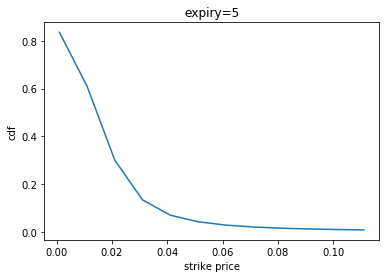

In [20]:
plt.plot(K[0],cdf[0])
plt.xlabel('strike price')
plt.ylabel('cdf')
plt.title('expiry=5')
#plt.yticks(np.arange(min(cdf[0]), max(cdf[0])+1, 0.2))
plt.show()

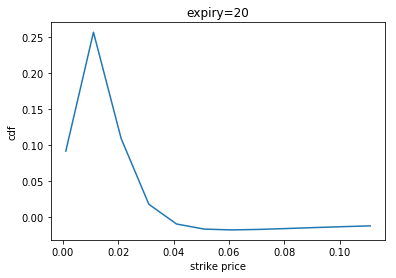

In [21]:
plt.plot(K[1],cdf[1])
plt.xlabel('strike price')
plt.ylabel('cdf')
plt.title('expiry=20')
#plt.yticks(np.arange(min(cdf[1]), max(cdf[1])+1, 0.2))
plt.show()

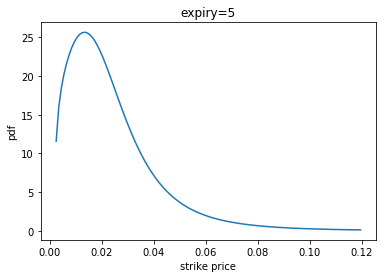

In [85]:
plt.plot(K[0],pdf[0])
plt.xlabel('strike price')
plt.ylabel('pdf')
plt.title('expiry=5')
#plt.yticks(np.arange(min(pdf[0]), max(pdf[0])+1, 0.2))
plt.show()

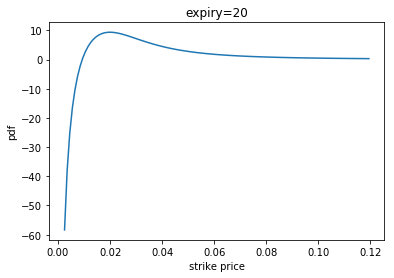

In [86]:
plt.plot(K[1],pdf[1])
plt.xlabel('strike price')
plt.ylabel('pdf')
plt.title('expiry=20')
#plt.yticks(np.arange(min(cdf[1]), max(cdf[1])+1, 0.2))
plt.show()